In [755]:
"""
Assignment

Attached is a dataset of car fuel economy data. It comes from https://www.fueleconomy.gov/feg/download.shtml.

The particular file is https://www.fueleconomy.gov/feg/epadata/vehicles.csv.zip "Datasets for All Model Years (1984–2019)”

The data dictionary is here: https://www.fueleconomy.gov/feg/ws/index.shtml#vehicle

*Question*

1. Which manufacturer produces the most fuel efficient fleet of cars?

2. Build a model to predict city mpg (variable “UCity” in column BG).

3. How has fuel economy changed over time? Are there any other interesting insights or trends?


As well as a complete model for UCity with code, we are looking for a coherent data-story that examines UCity 
as well one or more aspects of the data such as the evolution of a car manufacturer(s), engine types, future mpg. 
It is up to you. This is a deliberately open-ended question that provides a chance to showcase your EDA, analysis, and presentation skills.

The expectations is that you should spend no more than 3-4 hours on this task.
"""

'\nAssignment\n\nAttached is a dataset of car fuel economy data. It comes from https://www.fueleconomy.gov/feg/download.shtml.\n\nThe particular file is https://www.fueleconomy.gov/feg/epadata/vehicles.csv.zip "Datasets for All Model Years (1984–2019)”\n\nThe data dictionary is here: https://www.fueleconomy.gov/feg/ws/index.shtml#vehicle\n\n*Question*\n\n1. Which manufacturer produces the most fuel efficient fleet of cars?\n\n2. Build a model to predict city mpg (variable “UCity” in column BG).\n\n3. How has fuel economy changed over time? Are there any other interesting insights or trends?\n\n\nAs well as a complete model for UCity with code, we are looking for a coherent data-story that examines UCity \nas well one or more aspects of the data such as the evolution of a car manufacturer(s), engine types, future mpg. \nIt is up to you. This is a deliberately open-ended question that provides a chance to showcase your EDA, analysis, and presentation skills.\n\nThe expectations is that y

In [756]:
# imports
from datetime import date
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lars
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import warnings
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Bring in data and clean it

In [804]:
# bring in dataset
df_import = pd.read_csv('./vehicles.csv')
lookup = pd.read_csv('./dictionary_lookup.csv')

In [805]:
df_import.columns

Index(['barrels08', 'barrelsA08', 'charge120', 'charge240', 'city08',
       'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2',
       'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U',
       'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'cylinders',
       'displ', 'drive', 'engId', 'eng_dscr', 'feScore', 'fuelCost08',
       'fuelCostA08', 'fuelType', 'fuelType1', 'ghgScore', 'ghgScoreA',
       'highway08', 'highway08U', 'highwayA08', 'highwayA08U', 'highwayCD',
       'highwayE', 'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4', 'make',
       'model', 'mpgData', 'phevBlended', 'pv2', 'pv4', 'range', 'rangeCity',
       'rangeCityA', 'rangeHwy', 'rangeHwyA', 'trany', 'UCity', 'UCityA',
       'UHighway', 'UHighwayA', 'VClass', 'year', 'youSaveSpend', 'guzzler',
       'trans_dscr', 'tCharger', 'sCharger', 'atvType', 'fuelType2', 'rangeA',
       'evMotor', 'mfrCode', 'c240Dscr', 'charge240b', 'c240bDscr',
       'createdOn', 'modifiedOn

In [806]:
df_import.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,cityUF,co2,co2A,co2TailpipeAGpm,co2TailpipeGpm,comb08,comb08U,combA08,combA08U,combE,combinedCD,combinedUF,cylinders,displ,drive,engId,eng_dscr,feScore,fuelCost08,fuelCostA08,fuelType,fuelType1,ghgScore,ghgScoreA,highway08,highway08U,highwayA08,highwayA08U,highwayCD,highwayE,highwayUF,hlv,hpv,id,lv2,lv4,make,model,mpgData,phevBlended,pv2,pv4,range,rangeCity,rangeCityA,rangeHwy,rangeHwyA,trany,UCity,UCityA,UHighway,UHighwayA,VClass,year,youSaveSpend,guzzler,trans_dscr,tCharger,sCharger,atvType,fuelType2,rangeA,evMotor,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,423.190476,21,0.0,0,0.0,0.0,0.0,0.0,4.0,2.0,Rear-Wheel Drive,9011,(FFS),-1,2000,0,Regular,Regular Gasoline,-1,-1,25,0.0,0,0.0,0.0,0.0,0.0,0,0,1,0,0,Alfa Romeo,Spider Veloce 2000,Y,False,0,0,0,0.0,0.0,0.0,0.0,Manual 5-spd,23.3333,0.0,35.0000,0.0,Two Seaters,1985,-2250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,807.909091,11,0.0,0,0.0,0.0,0.0,0.0,12.0,4.9,Rear-Wheel Drive,22020,(GUZZLER),-1,3850,0,Regular,Regular Gasoline,-1,-1,14,0.0,0,0.0,0.0,0.0,0.0,0,0,10,0,0,Ferrari,Testarossa,N,False,0,0,0,0.0,0.0,0.0,0.0,Manual 5-spd,11.0000,0.0,19.0000,0.0,Two Seaters,1985,-11500,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,329.148148,27,0.0,0,0.0,0.0,0.0,0.0,4.0,2.2,Front-Wheel Drive,2100,(FFS),-1,1550,0,Regular,Regular Gasoline,-1,-1,33,0.0,0,0.0,0.0,0.0,0.0,19,77,100,0,0,Dodge,Charger,Y,False,0,0,0,0.0,0.0,0.0,0.0,Manual 5-spd,29.0000,0.0,47.0000,0.0,Subcompact Cars,1985,0,NaN,SIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,807.909091,11,0.0,0,0.0,0.0,0.0,0.0,8.0,5.2,Rear-Wheel Drive,2850,NaN,-1,3850,0,Regular,Regular Gasoline,-1,-1,12,0.0,0,0.0,0.0,0.0,0.0,0,0,1000,0,0,Dodge,B150/B250 Wagon 2WD,N,False,0,0,0,0.0,0.0,0.0,0.0,Automatic 3-spd,12.2222,0.0,16.6667,0.0,Vans,1985,-11500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,467.736842,19,0.0,0,0.0,0.0,0.0,0.0,4.0,2.2,4-Wheel or All-Wheel Drive,66031,"(FFS,TRBO)",-1,2700,0,Premium,Premium Gasoline,-1,-1,23,0.0,0,0.0,0.0,0.0,0.0,0,0,10000,0,14,Subaru,Legacy AWD Turbo,N,False,0,90,0,0.0,0.0,0.0,0.0,Manual 5-spd,21.0000,0.0,32.0000,0.0,Compact Cars,1993,-5750,NaN,NaN,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


##### cleaning out nulls

In [807]:
# first remove nulls
print('-------- initial null counts -----------')
print(df_import.isnull().sum())

# features with the most nulls -- deleted
df = df_import.dropna(thresh=int(df.shape[0] * .9), axis=1)


#check
print('-------- nulls counts after dropping high NA features -----------')
print(df.isnull().sum())

# remaining null rows are deleted in modelling section of the notebook


-------- initial null counts -----------
barrels08              0
barrelsA08             0
charge120              0
charge240              0
city08                 0
city08U                0
cityA08                0
cityA08U               0
cityCD                 0
cityE                  0
cityUF                 0
co2                    0
co2A                   0
co2TailpipeAGpm        0
co2TailpipeGpm         0
comb08                 0
comb08U                0
combA08                0
combA08U               0
combE                  0
combinedCD             0
combinedUF             0
cylinders            171
displ                169
drive               1189
engId                  0
eng_dscr           15899
feScore                0
fuelCost08             0
fuelCostA08            0
fuelType               0
fuelType1              0
ghgScore               0
ghgScoreA              0
highway08              0
highway08U             0
highwayA08             0
highwayA08U            0
highwayCD

In [808]:
# let's explore nature of nulls remaining to see how to deal with them - let's keep for now but delete in ML
#df[df.isnull().any(axis=1)]


# Here we see manufacturer with the most efficient fleet of cars

In [809]:
# lowest miles per gallon - just min avg ucity by manufacturer, agg, drive
best_mpg = df.groupby('make').agg(mean_UCity=('UCity', 'mean')).reset_index().sort_values(by='mean_UCity', ascending=False) 
best_mpg.head()

,make,mean_UCity
123,Tesla,127.505172
21,CODA Automotive,110.300000
13,BYD,95.778233
134,smart,92.472678
10,Azure Dynamics,88.400000


### Now I want to group mpg by other categorical variables and see a relationship

In [810]:
# get a list of categorical variables
categorical_list = []

for col in df.columns:
    if (df[col].dtype == 'O'):
        categorical_list.append(col)
        
categorical_list

['drive',
 'fuelType',
 'fuelType1',
 'make',
 'model',
 'mpgData',
 'trany',
 'VClass',
 'createdOn',
 'modifiedOn']

In [811]:
# can see what contributed the most 
df_list = []

# get a list of aggregated dfs
for col in categorical_list:
    result = df.groupby(col).agg(mean_UCity=('UCity', 'mean')).reset_index().sort_values(by='mean_UCity', ascending=False)
    df_list.append(result)

In [765]:
# here we see efficiency by various categorical variables
for table in df_list:
    print('         ')
    print('         ')
    print('_________')
    print(table.head())

         
         
_________
               drive  mean_UCity
4     Automatic (A1)   48.670200
5  Front-Wheel Drive   27.777302
3    All-Wheel Drive   25.180892
1      4-Wheel Drive   21.541393
0      2-Wheel Drive   21.328991
         
         
_________
                       fuelType  mean_UCity
2                   Electricity  140.504819
12  Regular Gas and Electricity   59.131841
13   Regular Gas or Electricity   58.700000
8    Premium Gas or Electricity   37.437446
9       Premium and Electricity   33.411545
         
         
_________
           fuelType1  mean_UCity
1        Electricity  140.504819
0             Diesel   27.755046
5   Regular Gasoline   22.722984
4   Premium Gasoline   21.433639
2  Midgrade Gasoline   18.789633
         
         
_________
                make  mean_UCity
123            Tesla  127.505172
21   CODA Automotive  110.300000
13               BYD   95.778233
134            smart   92.472678
10    Azure Dynamics   88.400000
         
         
__

# See how efficiency changes over time

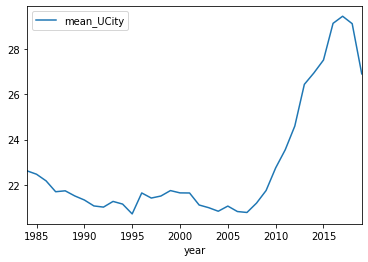

In [766]:
import matplotlib.pyplot as plt
import pandas as pd

# aggregate avg by year (and see what else can be agg on year)
df_agg = df.groupby('year').agg(mean_UCity=('UCity', 'mean')).reset_index()
df_agg.head()

# visualize - we see it went up a lot at one point
df2 = df_agg.set_index('year')
df2[['mean_UCity']].plot()
# plt.show()

## Visual EDA of variables - histograms EDA

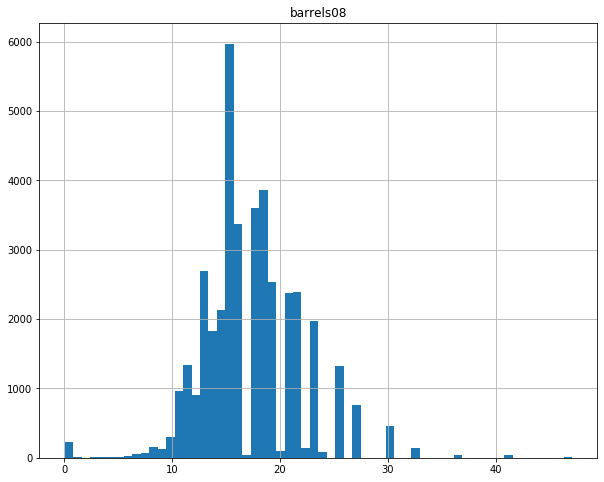

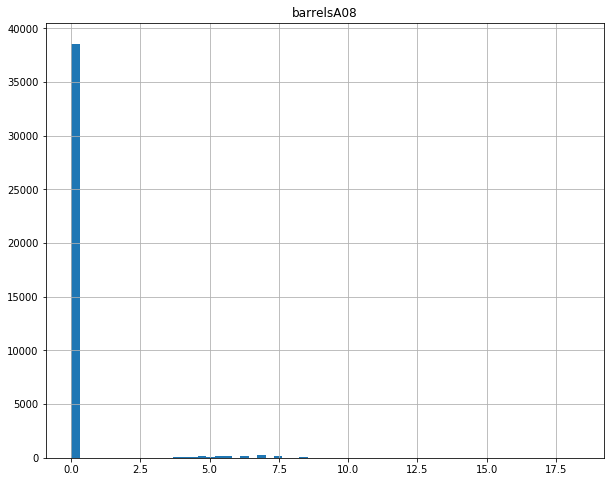

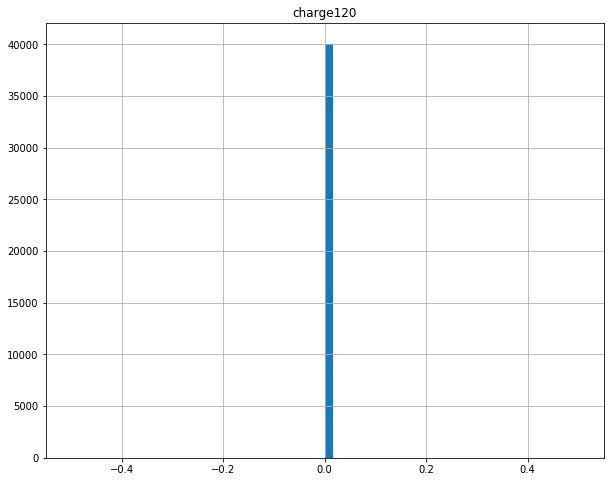

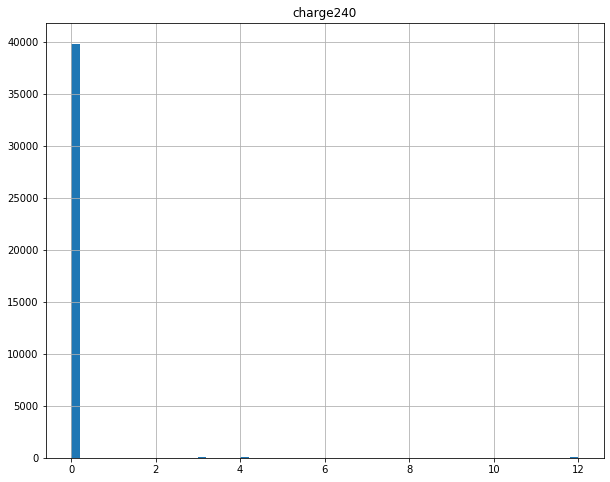

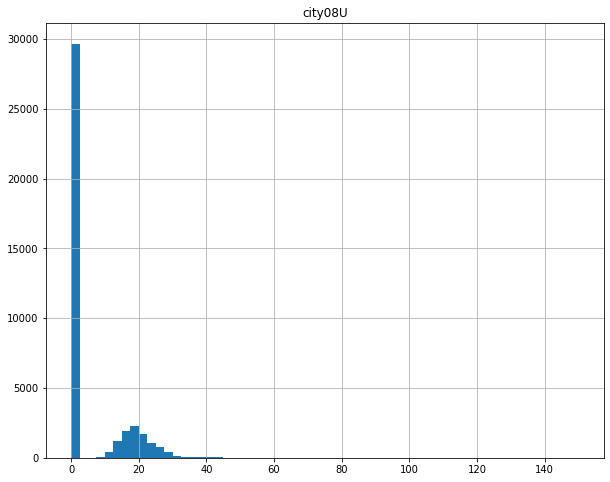

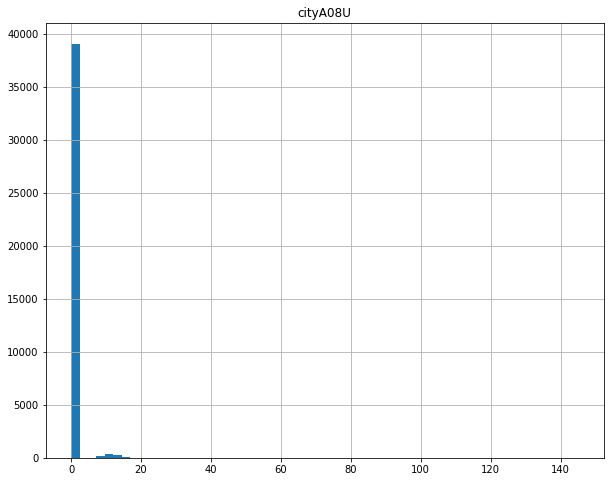

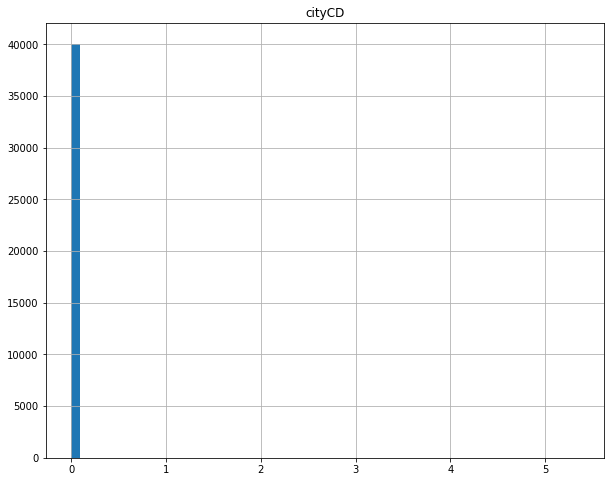

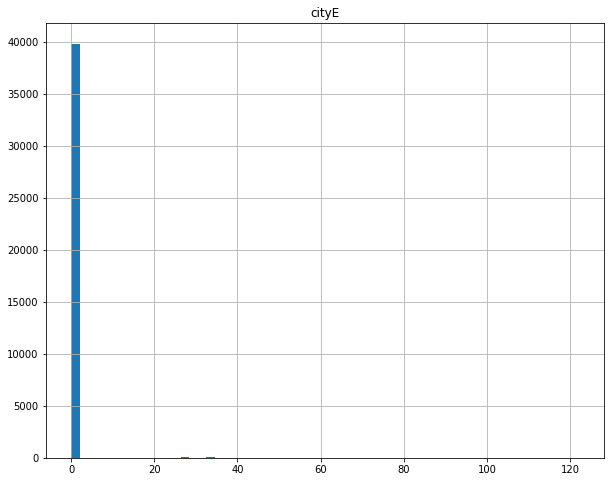

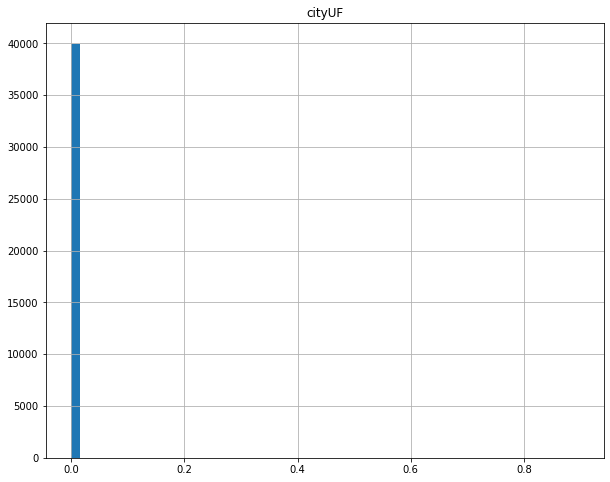

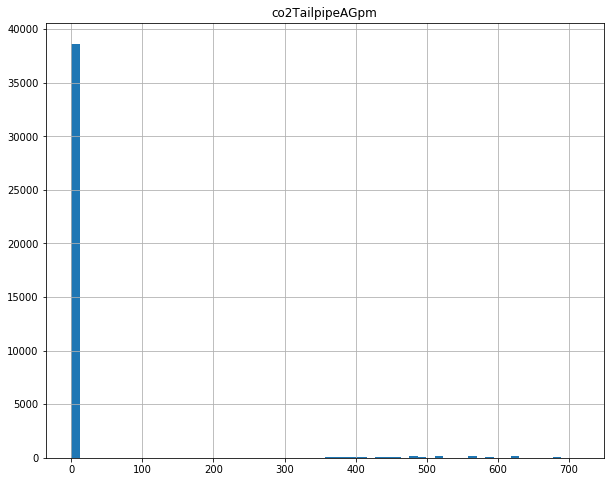

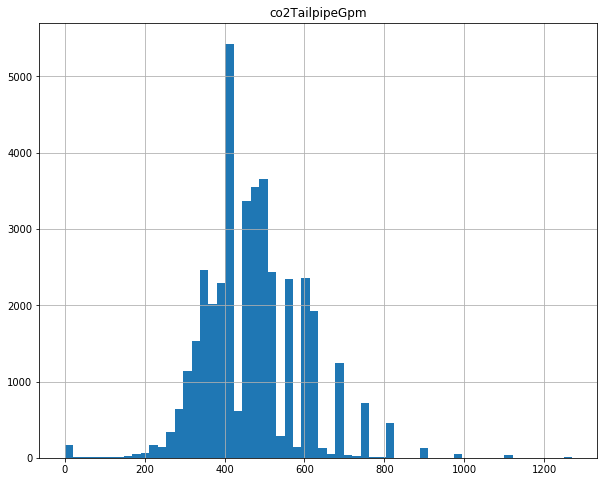

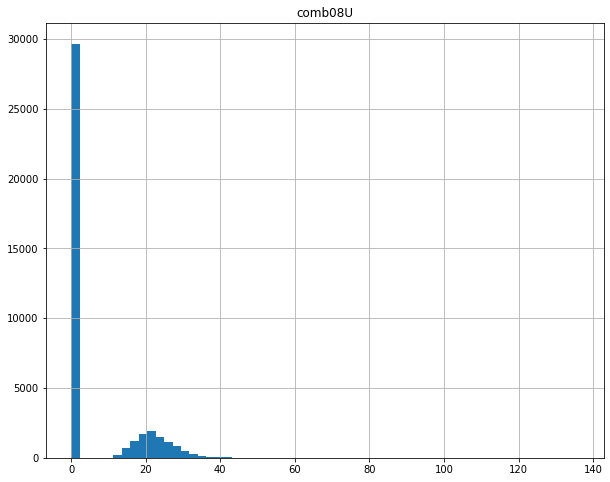

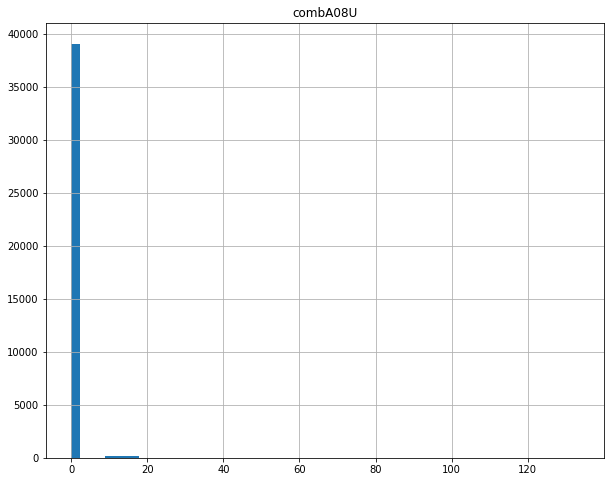

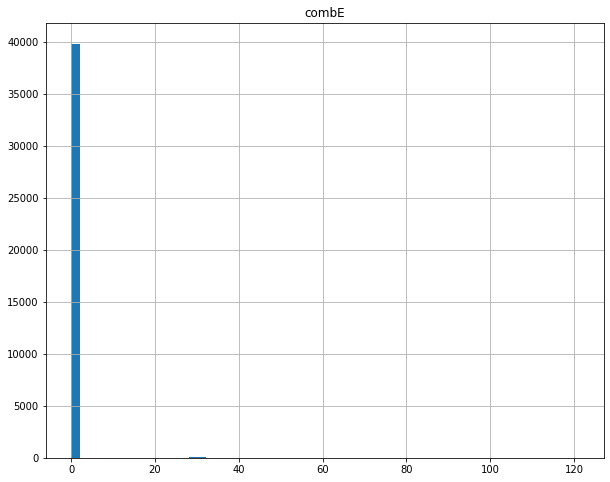

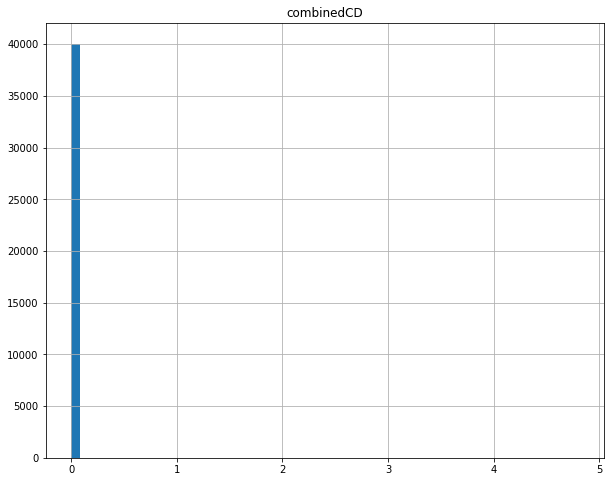

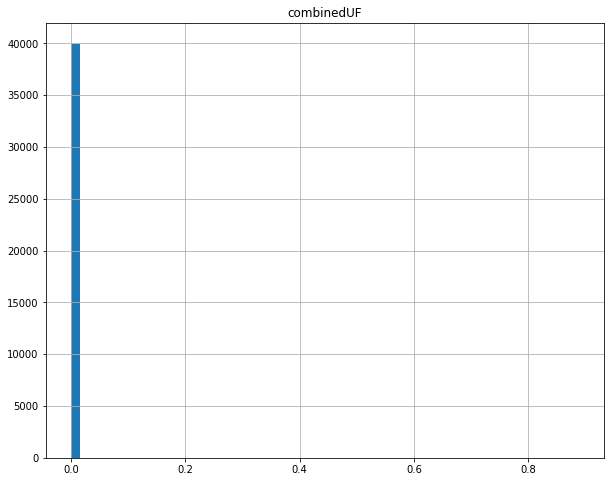

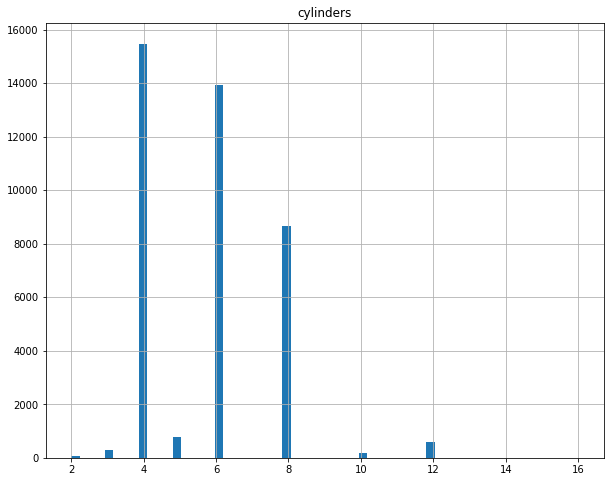

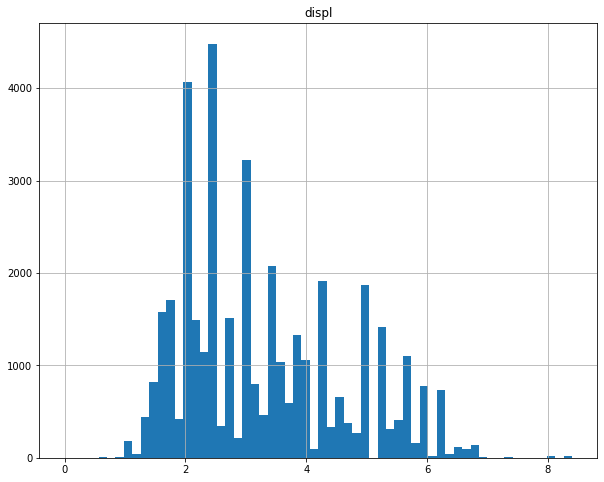

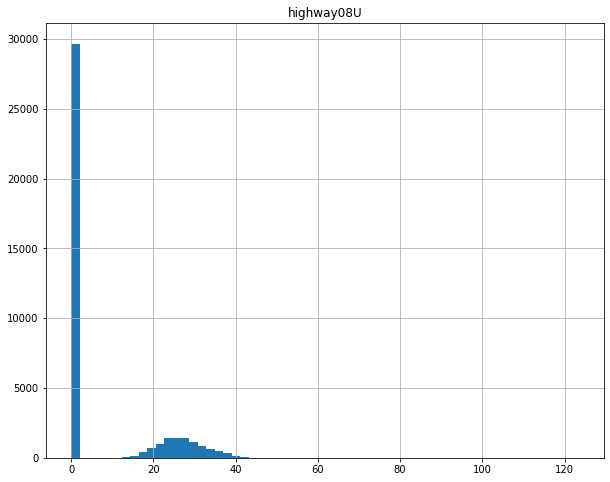

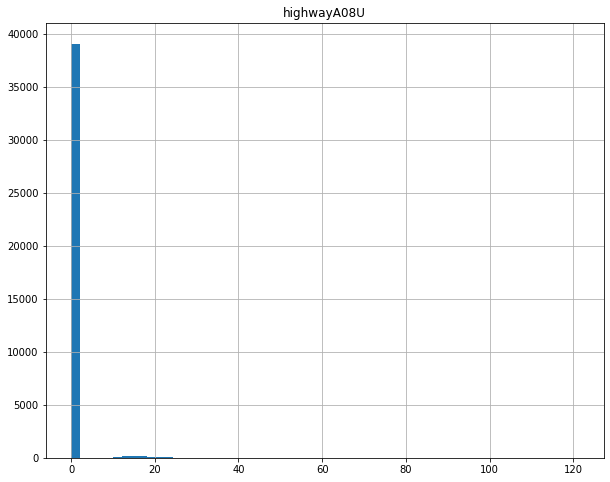

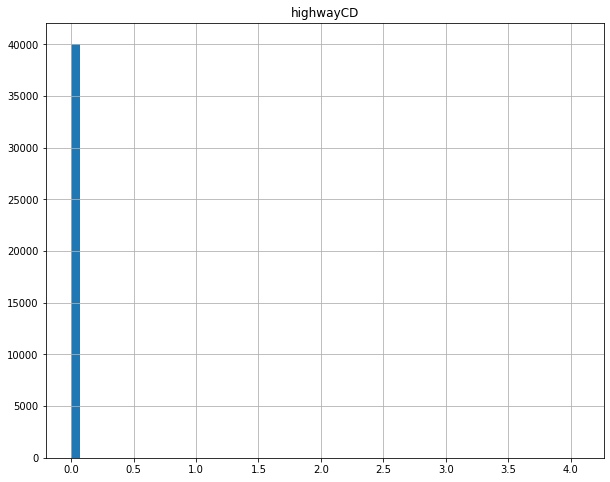

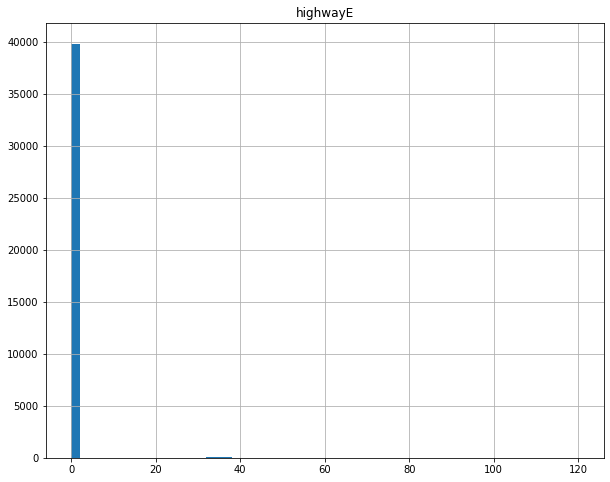

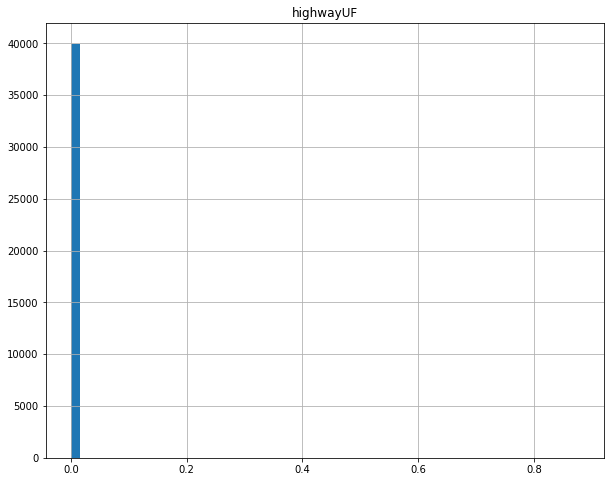

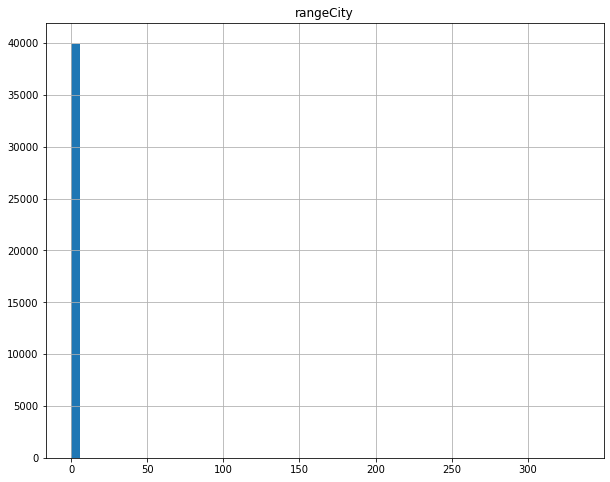

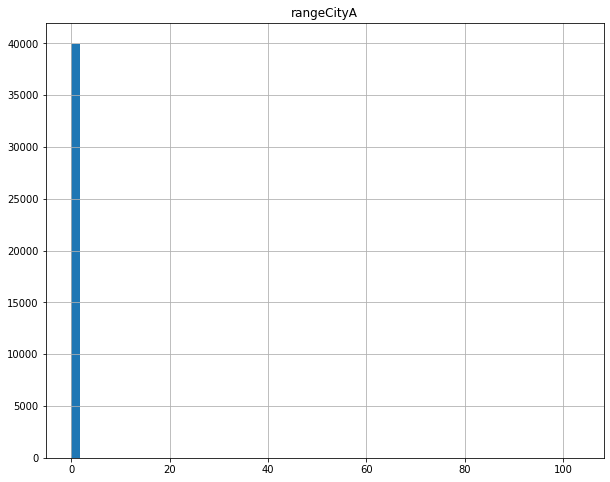

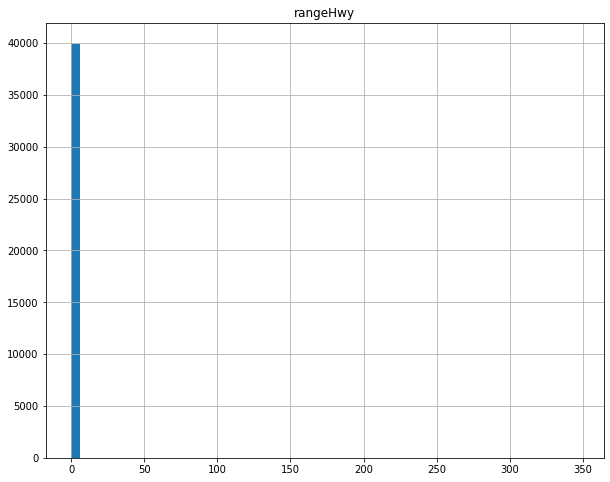

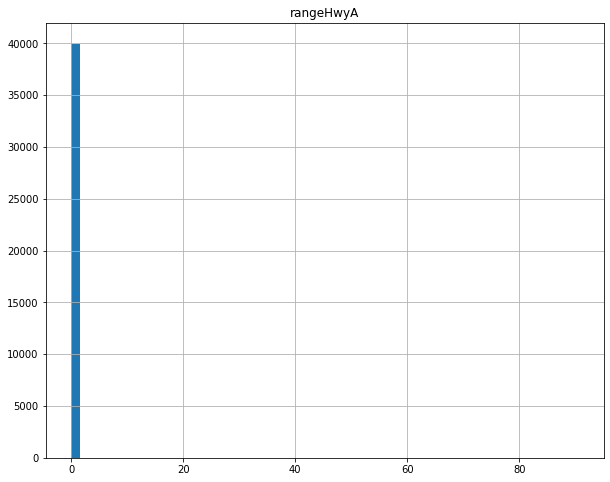

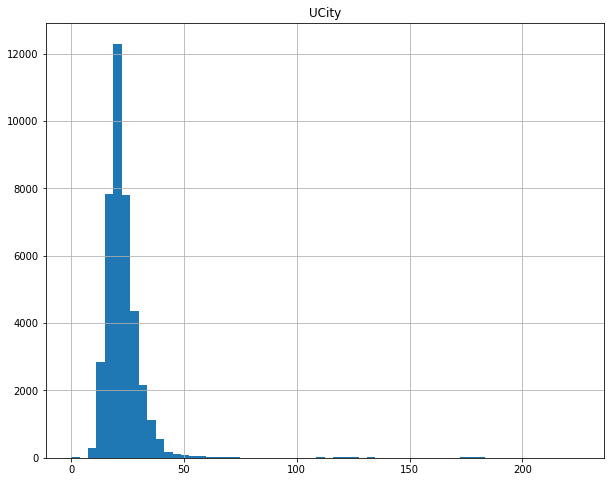

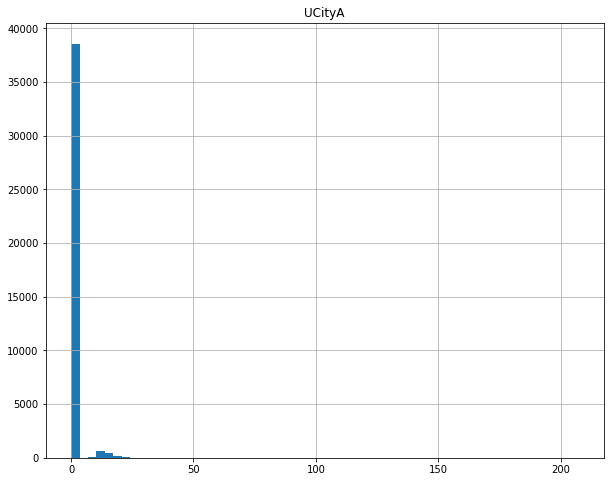

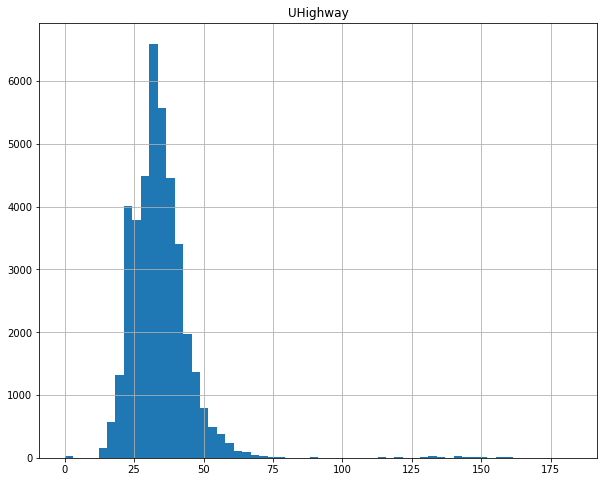

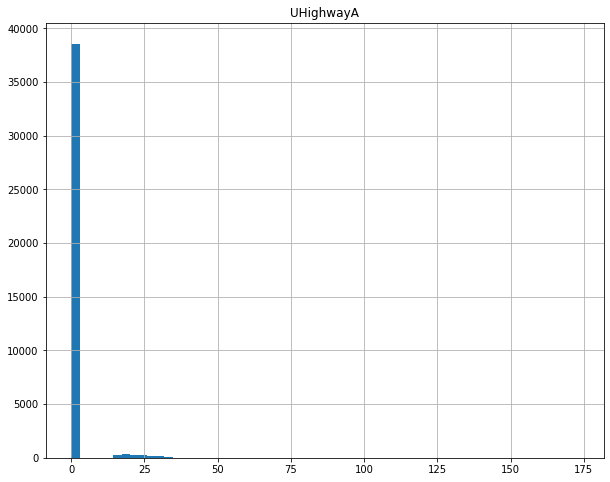

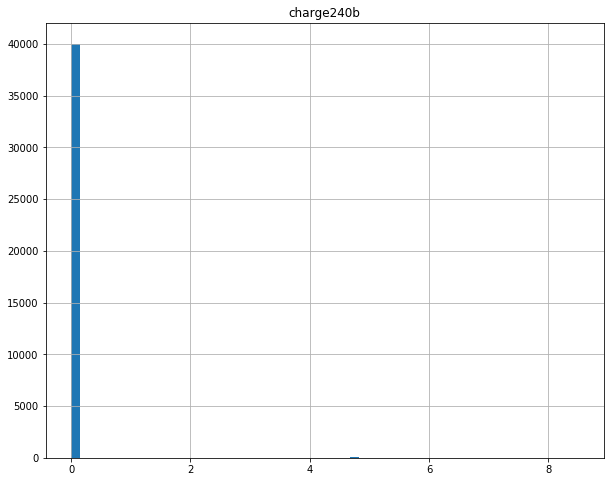

In [789]:
# this is distribution of variables - I wont focus too much - not enough context
# many variables don't look normal at all --> good to use nonparametric techniques
for col in numberical_list:  
    
    df_intermidiate = df[[col]] #.hist(bins=10, figsize=(10, 8))
    
    df_intermidiate.hist(bins=60, figsize=(10, 8)) #.plot()
    


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x16ab9fc50>]],
      dtype=object)

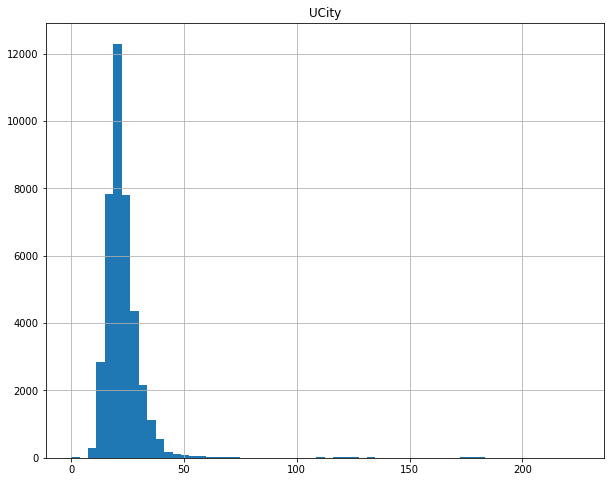

In [788]:
# the target variable itself
df[['UCity']].hist(bins=60, figsize=(10, 8))

In [792]:
# this shows some potential issues in data - why is a certain mpg type for so many vehicles is 0?
df[df['comb08U'] == 0].head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,cityUF,co2,co2A,co2TailpipeAGpm,co2TailpipeGpm,comb08,comb08U,combA08,combA08U,combE,combinedCD,combinedUF,cylinders,displ,drive,engId,feScore,fuelCost08,fuelCostA08,fuelType,fuelType1,ghgScore,ghgScoreA,highway08,highway08U,highwayA08,highwayA08U,highwayCD,highwayE,highwayUF,hlv,hpv,id,lv2,lv4,make,model,mpgData,phevBlended,pv2,pv4,range,rangeCity,rangeCityA,rangeHwy,rangeHwyA,trany,UCity,UCityA,UHighway,UHighwayA,VClass,year,youSaveSpend,charge240b,createdOn,modifiedOn,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,423.190476,21,0.0,0,0.0,0.0,0.0,0.0,4.0,2.0,Rear-Wheel Drive,9011,-1,2000,0,Regular,Regular Gasoline,-1,-1,25,0.0,0,0.0,0.0,0.0,0.0,0,0,1,0,0,Alfa Romeo,Spider Veloce 2000,Y,False,0,0,0,0.0,0.0,0.0,0.0,Manual 5-spd,23.3333,0.0,35.0000,0.0,Two Seaters,1985,-2250,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,807.909091,11,0.0,0,0.0,0.0,0.0,0.0,12.0,4.9,Rear-Wheel Drive,22020,-1,3850,0,Regular,Regular Gasoline,-1,-1,14,0.0,0,0.0,0.0,0.0,0.0,0,0,10,0,0,Ferrari,Testarossa,N,False,0,0,0,0.0,0.0,0.0,0.0,Manual 5-spd,11.0000,0.0,19.0000,0.0,Two Seaters,1985,-11500,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,329.148148,27,0.0,0,0.0,0.0,0.0,0.0,4.0,2.2,Front-Wheel Drive,2100,-1,1550,0,Regular,Regular Gasoline,-1,-1,33,0.0,0,0.0,0.0,0.0,0.0,19,77,100,0,0,Dodge,Charger,Y,False,0,0,0,0.0,0.0,0.0,0.0,Manual 5-spd,29.0000,0.0,47.0000,0.0,Subcompact Cars,1985,0,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,807.909091,11,0.0,0,0.0,0.0,0.0,0.0,8.0,5.2,Rear-Wheel Drive,2850,-1,3850,0,Regular,Regular Gasoline,-1,-1,12,0.0,0,0.0,0.0,0.0,0.0,0,0,1000,0,0,Dodge,B150/B250 Wagon 2WD,N,False,0,0,0,0.0,0.0,0.0,0.0,Automatic 3-spd,12.2222,0.0,16.6667,0.0,Vans,1985,-11500,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,467.736842,19,0.0,0,0.0,0.0,0.0,0.0,4.0,2.2,4-Wheel or All-Wheel Drive,66031,-1,2700,0,Premium,Premium Gasoline,-1,-1,23,0.0,0,0.0,0.0,0.0,0.0,0,0,10000,0,14,Subaru,Legacy AWD Turbo,N,False,0,90,0,0.0,0.0,0.0,0.0,Manual 5-spd,21.0000,0.0,32.0000,0.0,Compact Cars,1993,-5750,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0


### Correlations EDA 
#### Now want to examine correlates to this incrase in MPG over tim

In [767]:
# get a list of numerical vars
numberical_list = []

for col in df.columns:
    if (df[col].dtype == 'float64'):
        numberical_list.append(col)
        
numberical_list

['barrels08',
 'barrelsA08',
 'charge120',
 'charge240',
 'city08U',
 'cityA08U',
 'cityCD',
 'cityE',
 'cityUF',
 'co2TailpipeAGpm',
 'co2TailpipeGpm',
 'comb08U',
 'combA08U',
 'combE',
 'combinedCD',
 'combinedUF',
 'cylinders',
 'displ',
 'highway08U',
 'highwayA08U',
 'highwayCD',
 'highwayE',
 'highwayUF',
 'rangeCity',
 'rangeCityA',
 'rangeHwy',
 'rangeHwyA',
 'UCity',
 'UCityA',
 'UHighway',
 'UHighwayA',
 'charge240b']

In [768]:
# correlations 
correlations = df[numberical_list].corr()
correlations

,barrels08,barrelsA08,charge120,charge240,city08U,cityA08U,cityCD,cityE,cityUF,co2TailpipeAGpm,co2TailpipeGpm,comb08U,combA08U,combE,combinedCD,combinedUF,cylinders,displ,highway08U,highwayA08U,highwayCD,highwayE,highwayUF,rangeCity,rangeCityA,rangeHwy,rangeHwyA,UCity,UCityA,UHighway,UHighwayA,charge240b
barrels08,1.000000,0.083513,NaN,-0.234069,-0.417485,-0.112635,-0.020350,-0.241687,-0.127775,0.108044,0.988225,-0.412672,-0.109222,-0.244770,-0.017372,-0.127620,0.736043,0.786661,-0.398677,-0.102635,-0.013049,-0.247430,-0.127268,-0.196728,-0.113813,-0.190176,-0.115527,-0.712469,-0.101062,-0.845072,-0.082157,-0.143238
barrelsA08,0.083513,1.000000,NaN,0.027478,0.082373,0.377376,0.134321,0.095467,0.125350,0.968870,0.084753,0.089341,0.417435,0.092897,0.128043,0.126025,0.146220,0.164399,0.097324,0.472588,0.117119,0.089954,0.126548,-0.010147,0.085034,-0.009810,0.091047,-0.066128,0.464021,-0.075795,0.619393,-0.007387
charge120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
charge240,-0.234069,0.027478,NaN,1.000000,0.484871,0.239247,0.058882,0.692115,0.284172,-0.012776,-0.238485,0.439955,0.233773,0.689706,0.053830,0.284759,-0.039789,-0.048957,0.375222,0.222130,0.045417,0.684026,0.285393,0.921881,0.258554,0.917303,0.264728,0.623996,0.238958,0.505326,0.212126,0.797108
city08U,-0.417485,0.082373,NaN,0.484871,1.000000,0.176011,0.016995,0.355309,0.118626,0.065085,-0.425525,0.995279,0.181706,0.362396,0.013681,0.118000,-0.119800,-0.139627,0.976430,0.188229,0.009045,0.369349,0.117027,0.460611,0.103857,0.438076,0.104293,0.638491,0.153515,0.620118,0.158926,0.327472
cityA08U,-0.112635,0.377376,NaN,0.239247,0.176011,1.000000,0.083532,0.514149,0.882391,0.261480,-0.114056,0.173331,0.996595,0.512846,0.067858,0.879625,-0.016518,-0.014730,0.165913,0.979952,0.045924,0.510394,0.875082,-0.005384,0.797955,-0.005206,0.803097,0.090935,0.966164,0.066662,0.922197,-0.003920
cityCD,-0.020350,0.134321,NaN,0.058882,0.016995,0.083532,1.000000,0.124414,0.182697,-0.002272,-0.010908,0.016941,0.091747,0.122670,0.993281,0.181914,0.006899,-0.000577,0.016268,0.102097,0.961091,0.121834,0.180465,-0.000632,0.121612,-0.000611,0.127723,0.005063,0.078345,0.001570,0.095170,-0.000460
cityE,-0.241687,0.095467,NaN,0.692115,0.355309,0.514149,0.124414,1.000000,0.585908,-0.014772,-0.246062,0.321030,0.511793,0.998403,0.101139,0.588975,-0.032735,-0.041018,0.272137,0.498433,0.068645,0.992482,0.592310,0.506711,0.459558,0.496730,0.482143,0.490125,0.508633,0.374254,0.473859,0.372893
cityUF,-0.127775,0.125350,NaN,0.284172,0.118626,0.882391,0.182697,0.585908,1.000000,-0.009308,-0.128293,0.110816,0.858187,0.582390,0.165020,0.999665,-0.043015,-0.049706,0.097139,0.811172,0.137731,0.576754,0.998293,-0.002591,0.932152,-0.002505,0.943683,0.098911,0.883058,0.066167,0.779439,-0.001886
co2TailpipeAGpm,0.108044,0.968870,NaN,-0.012776,0.065085,0.261480,-0.002272,-0.014772,-0.009308,1.000000,0.108338,0.073041,0.301716,-0.014871,-0.001999,-0.009313,0.155928,0.176472,0.082905,0.359538,-0.001594,-0.014933,-0.009309,-0.009982,-0.007800,-0.009651,-0.008008,-0.082682,0.354424,-0.089490,0.518910,-0.007267


In [769]:
# most correlated items
top_correlations = correlations['UCity'].to_frame() \
                  .sort_values(by='UCity', ascending=False)[correlations['UCity'] > 0.5][1:]

top_correlations

,UCity
UHighway,0.924505
city08U,0.638491
charge240,0.623996
rangeCity,0.593646
comb08U,0.587552
rangeHwy,0.560807
highwayE,0.520141
highway08U,0.516126
combE,0.504884


Plot top positive correlations against mpg

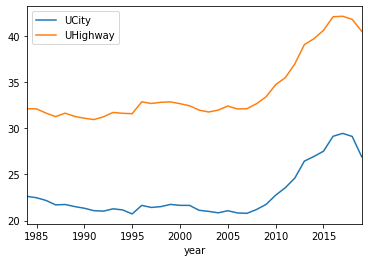

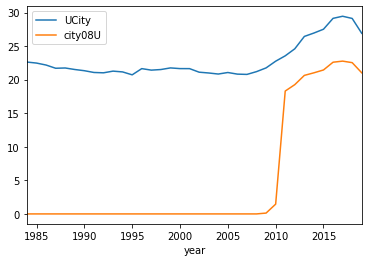

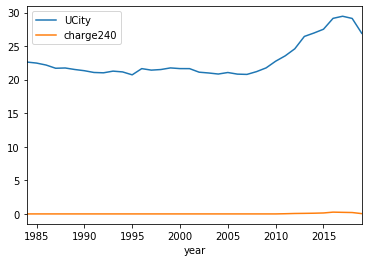

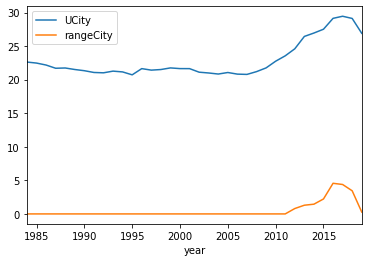

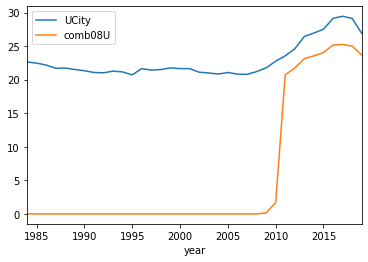

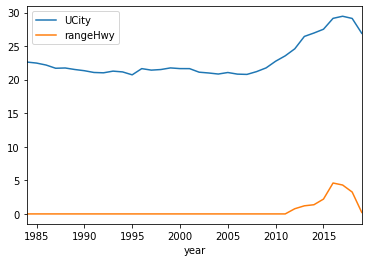

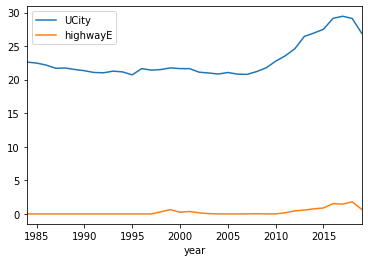

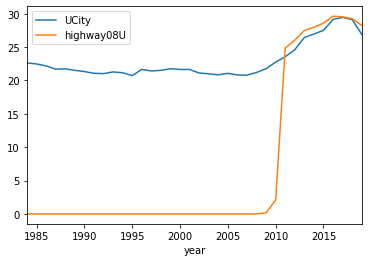

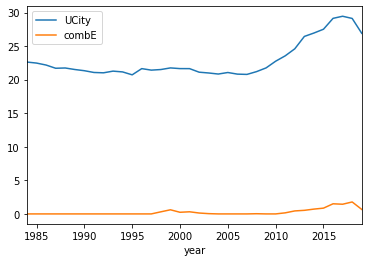

In [770]:
import matplotlib.pyplot as plt
import pandas as pd

# aggregate avg by year (and see what else can be agg on year)
for col in top_correlations.index:
    df_agg = df.groupby('year').agg({'UCity': 'mean', col: 'mean'})  
    
    df_agg.plot()

In [771]:
# most correlated in negative way
bottom_correlations = correlations['UCity'].to_frame() \
                  .sort_values(by='UCity', ascending=False)[correlations['UCity'] < -0.5][1:]

bottom_correlations

,UCity
barrels08,-0.712469
displ,-0.713249
co2TailpipeGpm,-0.725386


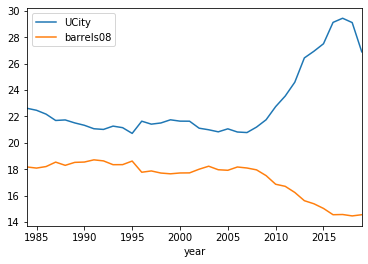

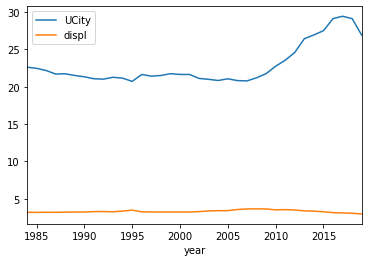

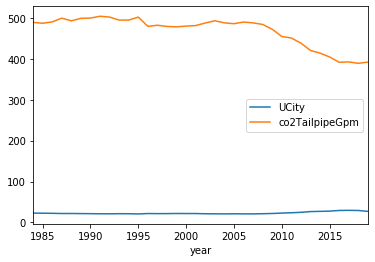

In [772]:
import matplotlib.pyplot as plt
import pandas as pd

# aggregate avg by year (and see what else can be agg on year)
for col in bottom_correlations.index:
    df_agg = df.groupby('year').agg({'UCity': 'mean', col: 'mean'})  
    
    df_agg.plot()

In [773]:
len(df)

40081

# Now we create the model to predict mpg

## Pre-processing steps

#### remove the nulls first

In [774]:
# first reove nulls, scale stuff
df.isnull().sum()

barrels08             0
barrelsA08            0
charge120             0
charge240             0
city08                0
city08U               0
cityA08               0
cityA08U              0
cityCD                0
cityE                 0
cityUF                0
co2                   0
co2A                  0
co2TailpipeAGpm       0
co2TailpipeGpm        0
comb08                0
comb08U               0
combA08               0
combA08U              0
combE                 0
combinedCD            0
combinedUF            0
cylinders           171
displ               169
drive              1189
engId                 0
feScore               0
fuelCost08            0
fuelCostA08           0
fuelType              0
fuelType1             0
ghgScore              0
ghgScoreA             0
highway08             0
highway08U            0
highwayA08            0
highwayA08U           0
highwayCD             0
highwayE              0
highwayUF             0
hlv                   0
hpv             

In [776]:
# now delete null rows - assume that not losing important biased info (like if nulls have a skew for a certain type of car)
# replacement is another possible strategy
df_null_cleaning_2 = df.dropna() 
df_null_cleaning_2.isnull().sum()

barrels08          0
barrelsA08         0
charge120          0
charge240          0
city08             0
city08U            0
cityA08            0
cityA08U           0
cityCD             0
cityE              0
cityUF             0
co2                0
co2A               0
co2TailpipeAGpm    0
co2TailpipeGpm     0
comb08             0
comb08U            0
combA08            0
combA08U           0
combE              0
combinedCD         0
combinedUF         0
cylinders          0
displ              0
drive              0
engId              0
feScore            0
fuelCost08         0
fuelCostA08        0
fuelType           0
fuelType1          0
ghgScore           0
ghgScoreA          0
highway08          0
highway08U         0
highwayA08         0
highwayA08U        0
highwayCD          0
highwayE           0
highwayUF          0
hlv                0
hpv                0
id                 0
lv2                0
lv4                0
make               0
model              0
mpgData      

#### Now let's clean up the dataframe further.

#### Removing variables that are equivalent to MPG (aka UCity)
Some variables in the dataset are essentially equivalents of MPG, so they are very correlated with MPG. This kind of relationship is not of interest because it is like saying "getting sick is correlated with getting ill." These are synonyms, and their correlation is obvious.Example of such variables are city, highway mpg, EPA rating, etc.
These very similar are labelled as 1 in the lookup table I created from the data dictionary. We will be seeking to get rid of them early on. Other codes are 0's for uncorrelated, 3 for label and 4 for identifiers
Instead, we want to look at innate characteristics of the car and how predictive they are of gas mileage. These boring variables are removed early on

In [777]:
lookup.head() # the lookup table

,column,description,classification
0,atvtype,type of alternative fuel or advanced technolo...,0
1,barrels08,annual petroleum consumption in barrels for f...,0
2,barrelsA08,annual petroleum consumption in barrels for f...,0
3,charge120,time to charge an electric vehicle in hours a...,0
4,charge240,time to charge an electric vehicle in hours a...,0


In [778]:
# isolate non-correlated variables and filter them out of df --> not interested in those variables
bad_columns = list(lookup[lookup['classification'] == 1]['column'].str.strip().to_numpy())
all_columns = list(df_null_cleaning_2.columns)
good_columns = [x for x in all_columns if x not in bad_columns]

# now subset df onto only good columns
df_subsetted = df_null_cleaning_2[good_columns]
df_subsetted.head()

,barrels08,barrelsA08,charge120,charge240,co2,co2A,co2TailpipeAGpm,co2TailpipeGpm,cylinders,displ,drive,engId,feScore,fuelCost08,fuelCostA08,fuelType,fuelType1,hlv,hpv,id,lv2,lv4,make,model,phevBlended,pv2,pv4,range,rangeCity,rangeHwy,trany,UCity,VClass,year,charge240b,createdOn,modifiedOn
0,15.695714,0.0,0.0,0.0,-1,-1,0.0,423.190476,4.0,2.0,Rear-Wheel Drive,9011,-1,2000,0,Regular,Regular Gasoline,0,0,1,0,0,Alfa Romeo,Spider Veloce 2000,False,0,0,0,0.0,0.0,Manual 5-spd,23.3333,Two Seaters,1985,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013
1,29.964545,0.0,0.0,0.0,-1,-1,0.0,807.909091,12.0,4.9,Rear-Wheel Drive,22020,-1,3850,0,Regular,Regular Gasoline,0,0,10,0,0,Ferrari,Testarossa,False,0,0,0,0.0,0.0,Manual 5-spd,11.0000,Two Seaters,1985,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013
2,12.207778,0.0,0.0,0.0,-1,-1,0.0,329.148148,4.0,2.2,Front-Wheel Drive,2100,-1,1550,0,Regular,Regular Gasoline,19,77,100,0,0,Dodge,Charger,False,0,0,0,0.0,0.0,Manual 5-spd,29.0000,Subcompact Cars,1985,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013
3,29.964545,0.0,0.0,0.0,-1,-1,0.0,807.909091,8.0,5.2,Rear-Wheel Drive,2850,-1,3850,0,Regular,Regular Gasoline,0,0,1000,0,0,Dodge,B150/B250 Wagon 2WD,False,0,0,0,0.0,0.0,Automatic 3-spd,12.2222,Vans,1985,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013
4,17.347895,0.0,0.0,0.0,-1,-1,0.0,467.736842,4.0,2.2,4-Wheel or All-Wheel Drive,66031,-1,2700,0,Premium,Premium Gasoline,0,0,10000,0,14,Subaru,Legacy AWD Turbo,False,0,90,0,0.0,0.0,Manual 5-spd,21.0000,Compact Cars,1993,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013


### Feature engineering

In [783]:
# we have id columns we want to remove prior to modelling
# id_columns = list(lookup[lookup['classification'] == 4]['column'].str.strip().to_numpy())
# id_columns

In [782]:
import datetime

#add car age instead of year
df_subsetted['age'] = datetime.datetime.now().year - \
                        pd.to_numeric(df_null_cleaning_2['year'])


#drops of columns which are not of predictive use
reduced_df = df_subsetted.drop(columns=['createdOn', 'modifiedOn', 'model', 'year', 'id', 'model'])

reduced_df.head()

,barrels08,barrelsA08,charge120,charge240,co2,co2A,co2TailpipeAGpm,co2TailpipeGpm,cylinders,displ,drive,engId,feScore,fuelCost08,fuelCostA08,fuelType,fuelType1,hlv,hpv,lv2,lv4,make,phevBlended,pv2,pv4,range,rangeCity,rangeHwy,trany,UCity,VClass,charge240b,age
0,15.695714,0.0,0.0,0.0,-1,-1,0.0,423.190476,4.0,2.0,Rear-Wheel Drive,9011,-1,2000,0,Regular,Regular Gasoline,0,0,0,0,Alfa Romeo,False,0,0,0,0.0,0.0,Manual 5-spd,23.3333,Two Seaters,0.0,35
1,29.964545,0.0,0.0,0.0,-1,-1,0.0,807.909091,12.0,4.9,Rear-Wheel Drive,22020,-1,3850,0,Regular,Regular Gasoline,0,0,0,0,Ferrari,False,0,0,0,0.0,0.0,Manual 5-spd,11.0000,Two Seaters,0.0,35
2,12.207778,0.0,0.0,0.0,-1,-1,0.0,329.148148,4.0,2.2,Front-Wheel Drive,2100,-1,1550,0,Regular,Regular Gasoline,19,77,0,0,Dodge,False,0,0,0,0.0,0.0,Manual 5-spd,29.0000,Subcompact Cars,0.0,35
3,29.964545,0.0,0.0,0.0,-1,-1,0.0,807.909091,8.0,5.2,Rear-Wheel Drive,2850,-1,3850,0,Regular,Regular Gasoline,0,0,0,0,Dodge,False,0,0,0,0.0,0.0,Automatic 3-spd,12.2222,Vans,0.0,35
4,17.347895,0.0,0.0,0.0,-1,-1,0.0,467.736842,4.0,2.2,4-Wheel or All-Wheel Drive,66031,-1,2700,0,Premium,Premium Gasoline,0,0,0,14,Subaru,False,0,90,0,0.0,0.0,Manual 5-spd,21.0000,Compact Cars,0.0,27


In [784]:
reduced_df.columns

Index(['barrels08', 'barrelsA08', 'charge120', 'charge240', 'co2', 'co2A',
       'co2TailpipeAGpm', 'co2TailpipeGpm', 'cylinders', 'displ', 'drive',
       'engId', 'feScore', 'fuelCost08', 'fuelCostA08', 'fuelType',
       'fuelType1', 'hlv', 'hpv', 'lv2', 'lv4', 'make', 'phevBlended', 'pv2',
       'pv4', 'range', 'rangeCity', 'rangeHwy', 'trany', 'UCity', 'VClass',
       'charge240b', 'age'],
      dtype='object')

#### pre-processing pipeline - scale, one hot encode, etc

In [794]:
# one hot encoding
df_dummied = pd.get_dummies(reduced_df)
df_dummied.columns
df_dummied.head()

,barrels08,barrelsA08,charge120,charge240,co2,co2A,co2TailpipeAGpm,co2TailpipeGpm,cylinders,displ,engId,feScore,fuelCost08,fuelCostA08,hlv,hpv,lv2,lv4,phevBlended,pv2,pv4,range,rangeCity,rangeHwy,UCity,charge240b,age,drive_2-Wheel Drive,drive_4-Wheel Drive,drive_4-Wheel or All-Wheel Drive,drive_All-Wheel Drive,drive_Automatic (A1),drive_Front-Wheel Drive,drive_Part-time 4-Wheel Drive,drive_Rear-Wheel Drive,fuelType_CNG,fuelType_Diesel,fuelType_Gasoline or E85,fuelType_Gasoline or natural gas,fuelType_Gasoline or propane,fuelType_Midgrade,fuelType_Premium,fuelType_Premium Gas or Electricity,fuelType_Premium and Electricity,fuelType_Premium or E85,fuelType_Regular,fuelType_Regular Gas and Electricity,fuelType_Regular Gas or Electricity,fuelType1_Diesel,fuelType1_Midgrade Gasoline,fuelType1_Natural Gas,fuelType1_Premium Gasoline,fuelType1_Regular Gasoline,make_AM General,make_ASC Incorporated,make_Acura,make_Alfa Romeo,make_American Motors Corporation,make_Aston Martin,make_Audi,make_Aurora Cars Ltd,make_Autokraft Limited,make_BMW,make_BMW Alpina,make_Bentley,make_Bertone,make_Bill Dovell Motor Car Company,make_Bitter Gmbh and Co. Kg,make_Bugatti,make_Buick,make_CCC Engineering,make_CX Automotive,make_Cadillac,make_Chevrolet,make_Chrysler,make_Consulier Industries Inc,make_Dabryan Coach Builders Inc,make_Dacia,make_Daewoo,make_Daihatsu,make_Dodge,"make_E. P. Dutton, Inc.",make_Eagle,make_Environmental Rsch and Devp Corp,make_Evans Automobiles,make_Excalibur Autos,make_Federal Coach,make_Ferrari,make_Fiat,make_Fisker,make_Ford,make_GMC,make_General Motors,make_Genesis,make_Geo,make_Goldacre,make_Grumman Allied Industries,make_Grumman Olson,make_Honda,make_Hummer,make_Hyundai,make_Import Foreign Auto Sales Inc,make_Import Trade Services,make_Infiniti,make_Isis Imports Ltd,make_Isuzu,make_J.K. Motors,"make_JBA Motorcars, Inc.",make_Jaguar,make_Jeep,make_Karma,make_Kia,make_Koenigsegg,make_Laforza Automobile Inc,make_Lambda Control Systems,make_Lamborghini,make_Land Rover,make_Lexus,make_Lincoln,make_London Coach Co Inc,make_London Taxi,make_Lotus,make_MINI,make_Mahindra,make_Maserati,make_Maybach,make_Mazda,make_McLaren Automotive,make_Mcevoy Motors,make_Mercedes-Benz,make_Mercury,make_Merkur,make_Mitsubishi,make_Mobility Ventures LLC,make_Morgan,make_Nissan,make_Oldsmobile,make_PAS Inc - GMC,"make_PAS, Inc",make_Pagani,make_Panos,make_Panoz Auto-Development,make_Panther Car Company Limited,make_Peugeot,make_Pininfarina,make_Plymouth,make_Pontiac,make_Porsche,make_Quantum Technologies,make_Qvale,make_Ram,make_Red Shift Ltd.,make_Renault,make_Rolls-Royce,make_Roush Performance,make_Ruf Automobile Gmbh,make_S and S Coach Company E.p. Dutton,make_SRT,make_Saab,make_Saleen,make_Saleen Performance,make_Saturn,make_Scion,make_Shelby,make_Spyker,make_Sterling,make_Subaru,make_Superior Coaches Div E.p. Dutton,make_Suzuki,make_TVR Engineering Ltd,"make_Tecstar, LP",make_Texas Coach Company,make_Toyota,make_VPG,make_Vector,make_Vixen Motor Company,make_Volga Associated Automobile,make_Volkswagen,make_Volvo,make_Wallace Environmental,make_Yugo,make_smart,trany_Automatic (A1),trany_Automatic (AM-S6),trany_Automatic (AM-S7),trany_Automatic (AM-S8),trany_Automatic (AM-S9),trany_Automatic (AM5),trany_Automatic (AM6),trany_Automatic (AM7),trany_Automatic (AM8),trany_Automatic (AV-S10),trany_Automatic (AV-S6),trany_Automatic (AV-S7),trany_Automatic (AV-S8),trany_Automatic (L3),trany_Automatic (L4),trany_Automatic (S10),trany_Automatic (S4),trany_Automatic (S5),trany_Automatic (S6),trany_Automatic (S7),trany_Automatic (S8),trany_Automatic (S9),trany_Automatic (variable gear ratios),trany_Automatic 10-spd,trany_Automatic 3-spd,trany_Automatic 4-spd,trany_Automatic 5-spd,trany_Automatic 6-spd,trany_Automatic 7-spd,trany_Automatic 8-spd,trany_Automatic 9-spd,trany_Manual 3-spd,trany_Manual 4-spd,trany_Manual 5-spd,trany_Manual 6-spd,trany_Manual 7-spd,VClass_Compact Cars,VClass_Large Cars,VClass_Midsize Cars,VClass_Midsize Station Wagons,VClass_Midsize-

#### scaling and normalization of numerics here

In [795]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


response = df_dummied[['UCity']]
features = df_dummied.drop(columns=['UCity'])
# features = df_dummied.drop(columns=['UCity', 'UCityA', 'city08', 'city08U', 'cityA08', \
#                                     'cityA08U' , 'combA08' , 'combA08U' , 'highway08', \
#                                     'highway08U' , 'highwayA08', 'highwayA08', 'highwayA08U', \
#                                     'UHighway', 'UHighwayA', 'phevCity', 'phevHwy', 'phevComb', \
#                                      'comb08', 'comb08U', 'id', 'mpgData', 'UCityA'])






# have train and test -- and response variable is separate
x_train, x_test, y_train, y_test = train_test_split(features, response, test_size = 0.2, random_state = 0)

# feature scaler
scaler = StandardScaler()




#fit scaler to x features - column names lost temporarily
x_train_fit = pd.DataFrame(scaler.fit_transform(x_train))
x_test_fit = pd.DataFrame(scaler.fit_transform(x_test))

#map col names back
x_train_fit.columns = x_train.columns.values
x_test_fit.columns = x_test.columns.values

# reset index 
x_train_fit.index = x_train.index.values
x_test_fit.index = x_test.index.values

In [796]:
x_test_fit.head()

,barrels08,barrelsA08,charge120,charge240,co2,co2A,co2TailpipeAGpm,co2TailpipeGpm,cylinders,displ,engId,feScore,fuelCost08,fuelCostA08,hlv,hpv,lv2,lv4,phevBlended,pv2,pv4,range,rangeCity,rangeHwy,charge240b,age,drive_2-Wheel Drive,drive_4-Wheel Drive,drive_4-Wheel or All-Wheel Drive,drive_All-Wheel Drive,drive_Automatic (A1),drive_Front-Wheel Drive,drive_Part-time 4-Wheel Drive,drive_Rear-Wheel Drive,fuelType_CNG,fuelType_Diesel,fuelType_Gasoline or E85,fuelType_Gasoline or natural gas,fuelType_Gasoline or propane,fuelType_Midgrade,fuelType_Premium,fuelType_Premium Gas or Electricity,fuelType_Premium and Electricity,fuelType_Premium or E85,fuelType_Regular,fuelType_Regular Gas and Electricity,fuelType_Regular Gas or Electricity,fuelType1_Diesel,fuelType1_Midgrade Gasoline,fuelType1_Natural Gas,fuelType1_Premium Gasoline,fuelType1_Regular Gasoline,make_AM General,make_ASC Incorporated,make_Acura,make_Alfa Romeo,make_American Motors Corporation,make_Aston Martin,make_Audi,make_Aurora Cars Ltd,make_Autokraft Limited,make_BMW,make_BMW Alpina,make_Bentley,make_Bertone,make_Bill Dovell Motor Car Company,make_Bitter Gmbh and Co. Kg,make_Bugatti,make_Buick,make_CCC Engineering,make_CX Automotive,make_Cadillac,make_Chevrolet,make_Chrysler,make_Consulier Industries Inc,make_Dabryan Coach Builders Inc,make_Dacia,make_Daewoo,make_Daihatsu,make_Dodge,"make_E. P. Dutton, Inc.",make_Eagle,make_Environmental Rsch and Devp Corp,make_Evans Automobiles,make_Excalibur Autos,make_Federal Coach,make_Ferrari,make_Fiat,make_Fisker,make_Ford,make_GMC,make_General Motors,make_Genesis,make_Geo,make_Goldacre,make_Grumman Allied Industries,make_Grumman Olson,make_Honda,make_Hummer,make_Hyundai,make_Import Foreign Auto Sales Inc,make_Import Trade Services,make_Infiniti,make_Isis Imports Ltd,make_Isuzu,make_J.K. Motors,"make_JBA Motorcars, Inc.",make_Jaguar,make_Jeep,make_Karma,make_Kia,make_Koenigsegg,make_Laforza Automobile Inc,make_Lambda Control Systems,make_Lamborghini,make_Land Rover,make_Lexus,make_Lincoln,make_London Coach Co Inc,make_London Taxi,make_Lotus,make_MINI,make_Mahindra,make_Maserati,make_Maybach,make_Mazda,make_McLaren Automotive,make_Mcevoy Motors,make_Mercedes-Benz,make_Mercury,make_Merkur,make_Mitsubishi,make_Mobility Ventures LLC,make_Morgan,make_Nissan,make_Oldsmobile,make_PAS Inc - GMC,"make_PAS, Inc",make_Pagani,make_Panos,make_Panoz Auto-Development,make_Panther Car Company Limited,make_Peugeot,make_Pininfarina,make_Plymouth,make_Pontiac,make_Porsche,make_Quantum Technologies,make_Qvale,make_Ram,make_Red Shift Ltd.,make_Renault,make_Rolls-Royce,make_Roush Performance,make_Ruf Automobile Gmbh,make_S and S Coach Company E.p. Dutton,make_SRT,make_Saab,make_Saleen,make_Saleen Performance,make_Saturn,make_Scion,make_Shelby,make_Spyker,make_Sterling,make_Subaru,make_Superior Coaches Div E.p. Dutton,make_Suzuki,make_TVR Engineering Ltd,"make_Tecstar, LP",make_Texas Coach Company,make_Toyota,make_VPG,make_Vector,make_Vixen Motor Company,make_Volga Associated Automobile,make_Volkswagen,make_Volvo,make_Wallace Environmental,make_Yugo,make_smart,trany_Automatic (A1),trany_Automatic (AM-S6),trany_Automatic (AM-S7),trany_Automatic (AM-S8),trany_Automatic (AM-S9),trany_Automatic (AM5),trany_Automatic (AM6),trany_Automatic (AM7),trany_Automatic (AM8),trany_Automatic (AV-S10),trany_Automatic (AV-S6),trany_Automatic (AV-S7),trany_Automatic (AV-S8),trany_Automatic (L3),trany_Automatic (L4),trany_Automatic (S10),trany_Automatic (S4),trany_Automatic (S5),trany_Automatic (S6),trany_Automatic (S7),trany_Automatic (S8),trany_Automatic (S9),trany_Automatic (variable gear ratios),trany_Automatic 10-spd,trany_Automatic 3-spd,trany_Automatic 4-spd,trany_Automatic 5-spd,trany_Automatic 6-spd,trany_Automatic 7-spd,trany_Automatic 8-spd,trany_Automatic 9-spd,trany_Manual 3-spd,trany_Manual 4-spd,trany_Manual 5-spd,trany_Manual 6-spd,trany_Manual 7-spd,VClass_Compact Cars,VClass_Large Cars,VClass_Midsize Cars,VClass_Midsize Station Wagons,VClass_Midsize-Large 

## The models

In [814]:
from sklearn.metrics import r2_score, mean_squared_error, make_scorer    
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


result_dict = {}


def build_model(regression_fn, 
                name_of_y_col, 
                names_of_x_cols, 
                x_train, 
                x_test,
                y_train,
                y_test,
                test_frac=0.2,
                preprocess_fn=None,
                show_plot_Y=False,
                show_plot_scatter=False):
    
    # set up model
    model = regression_fn(x_train, y_train)
    
    # predictions
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    

    
    # error metrics
    print("Training_score : " , r2_score(y_train, y_pred_train))
    print("Test_score : ", r2_score(y_test, y_pred_test))
    print('Training mse', mean_squared_error(y_train, y_pred_train))
    print('Test mse', mean_squared_error(y_test, y_pred_test))
      
    
    return {'imps': model.best_estimator_.feature_importances_,    
            'training_score R 2': r2_score(y_train, y_pred_train), 
            'test_score R2': r2_score(y_test, y_pred_test), 
            'mean_squared_error_train': mean_squared_error(y_train, y_pred_train), 
            'mean_squared_error_test': mean_squared_error(y_test, y_pred_test)}     



"""
def compare_results():
    for key in result_dict:
        print('Regression: ', key)
        print('Training score', result_dict[key]['training_score'])
        print('Test score', result_dict[key]['test_score'])
        #print('Training mse', result_dict[key]['training_score'])
        #print('Test mse', result_dict[key]['test_score'])
        
        print()
        
 """       


"\ndef compare_results():\n    for key in result_dict:\n        print('Regression: ', key)\n        print('Training score', result_dict[key]['training_score'])\n        print('Test score', result_dict[key]['test_score'])\n        #print('Training mse', result_dict[key]['training_score'])\n        #print('Test mse', result_dict[key]['test_score'])\n        \n        print()\n        \n "

In [815]:


def decision_tree_reg(x_train, y_train, max_depth=10):
    
    parameters = {'max_depth':[4, 10, 17, 30]}
    grid_search = GridSearchCV(DecisionTreeRegressor(), parameters, cv=3, return_train_score=True)
    grid_search.fit(x_train, y_train)
    print(grid_search.best_params_)
    
    return grid_search #model




result_dict['mpg - decision_tree'] = build_model(decision_tree_reg,
                                                  'UCity',
                                                  list(features.columns),    #columns_pre,
                                                  x_train_fit,
                                                  x_test_fit, 
                                                  y_train, 
                                                  y_test,
                                                  show_plot_Y=True)

{'max_depth': 30}
Training_score :  0.999774599517174
Test_score :  0.9845092108303012
Training mse 0.010388719152049095
Test mse 0.6737655378768812


#### look at feature importances - to look at most important variables

In [816]:
# zip the 2 flists together into a dataframe
imps = list(result_dict['mpg - decision_tree']['imps'])
col_labels = list(x_train_fit.columns)

df_imps_pre = {'importances': imps, 'labels': col_labels}
df_imps = pd.DataFrame(data=df_imps_pre)
df_imps.sort_values(by='importances', ascending=False)

,importances,labels
7,8.154944e-01,co2TailpipeGpm
12,1.491602e-01,fuelCost08
47,5.493671e-03,fuelType1_Diesel
0,3.821392e-03,barrels08
9,3.439642e-03,displ
8,2.269065e-03,cylinders
10,2.118547e-03,engId
25,1.945090e-03,age
35,1.521322e-03,fuelType_Diesel
214,1.213189e-03,trany_Manual 5-spd


In [818]:
# add other estimators - random forest

def rf_reg(x_train, y_train, max_depth=10):
    #model = DecisionTreeRegressor(max_depth=max_depth)
    #model.fit(x_train, y_train)
    
    parameters = {'max_depth':[10, 17], 'n_estimators': [10, 50]}
    grid_search = GridSearchCV(RandomForestRegressor(), parameters, cv=3, return_train_score=True)
    grid_search.fit(x_train, y_train)
    print(grid_search.best_params_)
    
    return grid_search #model




result_dict['mpg - rf'] = build_model(rf_reg,
                                      'UCity',
                                      list(features.columns),
                                      x_train_fit,
                                      x_test_fit, 
                                      y_train, 
                                      y_test,
                                      show_plot_Y=True)

{'max_depth': 17, 'n_estimators': 50}
Training_score :  0.997615113670606
Test_score :  0.9920217585060471
Training mse 0.1099195262361499
Test mse 0.34701034999557395


In [819]:
# zip the 2 features together
imps = list(result_dict['mpg - rf']['imps'])
col_labels = list(x_train_fit.columns)

df_imps_pre = {'importances': imps, 'labels': col_labels}
df_imps = pd.DataFrame(data=df_imps_pre)
df_imps.sort_values(by='importances', ascending=False)

,importances,labels
7,8.345908e-01,co2TailpipeGpm
12,1.138814e-01,fuelCost08
0,2.061908e-02,barrels08
9,3.438265e-03,displ
35,3.408353e-03,fuelType_Diesel
47,3.213468e-03,fuelType1_Diesel
8,2.291605e-03,cylinders
25,1.902102e-03,age
10,1.646016e-03,engId
14,8.626356e-04,hlv


How does mean squared error stack up to natural variation?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13f6619d0>]],
      dtype=object)

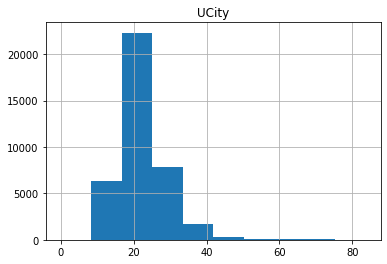

In [570]:
# natural standard deviation
response.hist()

In [572]:
response.describe()

,UCity
count,38727.000000
mean,22.417579
std,6.750723
min,0.000000
25%,18.000000
50%,21.111100
75%,25.381600
max,83.559800


 ###### R square is great. And mse (which is 0.34) is much smaller than the range of the UCity variable  - which ranges from 0 to 83